# Zbiory danych treningowych

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from IPython.display import display
from collections import Counter
from matplotlib.colors import rgb2hex
from matplotlib.cm import get_cmap
import matplotlib.pyplot as plt
# To create interactive plots
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
import seaborn as sns


TRAIN_FILE_NAME = "train.csv"
TEST_FILE_NAME = "test.csv"
TARGET_CLASS_NAME = "class"

colors = ["#0101DF", "#DF0101"]

In [22]:

def load_data(path):
  if path is None or path == "":
    raise ValueError("Dataset path is invalid")
  elif not os.path.exists(path):
    raise FileNotFoundError(f"Dataset not found at path: {path}")

  train_path = os.path.join(path, TRAIN_FILE_NAME)

  df = pd.read_csv(train_path)
  return df.sample(frac=0.8, random_state=42) # file size must not exceed 100MB in GitHub

In [23]:
def analyze_data(df, class_column_key):
  #display shape
  display(df.shape)
  #display sum of cells having null value and column name
  null_counts = df.isnull().sum()
  max_nulls = null_counts.max()
  max_null_col = null_counts[null_counts == max_nulls].index[0] if max_nulls > 0 else "No nulls"
  display(f"Maximum null values: {max_nulls} in column: {max_null_col}")
  # Get null values and dataframe information
  print('Null Values In DataFrame: {}\n'.format(df.isna().sum().sum()))
  display(df.info())

  label_col = df[class_column_key]

  # Plotting data
  label_counts = label_col.value_counts()

  # Get colors
  n = label_counts.shape[0]
  colormap = get_cmap('viridis')
  colors = [rgb2hex(colormap(col)) for col in np.arange(0, 1.01, 1/(n-1))]

  plt.figure(figsize=(10, 6)) # Create a new figure and set its size
  plt.bar(label_counts.index, label_counts.values, color=colors) # Create a bar plot
  plt.title('Class counts') # Set the title of the plot
  plt.xlabel('Class names') # Set the label for the x-axis
  plt.ylabel('Count') # Set the label for the y-axis
  plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
  plt.tight_layout() # Adjust layout to prevent labels from overlapping
  plt.show() # Display the plot

  display(df.describe(include='all'))

# Unbalanced credit card frauds

In [24]:
df = load_data("data/raw/binary_unbalanced_credit_card_fraud")
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [25]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
43428,41505.0,-16.526507,8.584972,-18.649853,9.505594,-13.793819,-2.832404,-16.701694,7.517344,-8.507059,...,1.190739,-1.127670,-2.358579,0.673461,-1.413700,-0.462762,-2.018575,-1.042804,364.19,1
49906,44261.0,0.339812,-2.743745,-0.134070,-1.385729,-1.451413,1.015887,-0.524379,0.224060,0.899746,...,-0.213436,-0.942525,-0.526819,-1.156992,0.311211,-0.746647,0.040996,0.102038,520.12,0
29474,35484.0,1.399590,-0.590701,0.168619,-1.029950,-0.539806,0.040444,-0.712567,0.002299,-0.971747,...,0.102398,0.168269,-0.166639,-0.810250,0.505083,-0.232340,0.011409,0.004634,31.00,0
276481,167123.0,-0.432071,1.647895,-1.669361,-0.349504,0.785785,-0.630647,0.276990,0.586025,-0.484715,...,0.358932,0.873663,-0.178642,-0.017171,-0.207392,-0.157756,-0.237386,0.001934,1.50,0
278846,168473.0,2.014160,-0.137394,-1.015839,0.327269,-0.182179,-0.956571,0.043241,-0.160746,0.363241,...,-0.238644,-0.616400,0.347045,0.061561,-0.360196,0.174730,-0.078043,-0.070571,0.89,0


In [26]:
#rename columns to lower case
df.columns = df.columns.str.lower()
df.head()

,time,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v21,v22,v23,v24,v25,v26,v27,v28,amount,class
43428,41505.0,-16.526507,8.584972,-18.649853,9.505594,-13.793819,-2.832404,-16.701694,7.517344,-8.507059,...,1.190739,-1.127670,-2.358579,0.673461,-1.413700,-0.462762,-2.018575,-1.042804,364.19,1
49906,44261.0,0.339812,-2.743745,-0.134070,-1.385729,-1.451413,1.015887,-0.524379,0.224060,0.899746,...,-0.213436,-0.942525,-0.526819,-1.156992,0.311211,-0.746647,0.040996,0.102038,520.12,0
29474,35484.0,1.399590,-0.590701,0.168619,-1.029950,-0.539806,0.040444,-0.712567,0.002299,-0.971747,...,0.102398,0.168269,-0.166639,-0.810250,0.505083,-0.232340,0.011409,0.004634,31.00,0
276481,167123.0,-0.432071,1.647895,-1.669361,-0.349504,0.785785,-0.630647,0.276990,0.586025,-0.484715,...,0.358932,0.873663,-0.178642,-0.017171,-0.207392,-0.157756,-0.237386,0.001934,1.50,0
278846,168473.0,2.014160,-0.137394,-1.015839,0.327269,-0.182179,-0.956571,0.043241,-0.160746,0.363241,...,-0.238644,-0.616400,0.347045,0.061561,-0.360196,0.174730,-0.078043,-0.070571,0.89,0


In [28]:
print('No Frauds', round(df['class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
num_of_frauds = df['class'].value_counts()[1]
print('Frauds', round(num_of_frauds/len(df) * 100,2), '% of the dataset')
print('Number of fraud transactions', num_of_frauds)

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset
Number of fraud transactions 387


# Analyze columns and nulls


(227846, 31)

'Maximum null values: 0 in column: No nulls'

Null Values In DataFrame: 0

<class 'pandas.core.frame.DataFrame'>
Int64Index: 227846 entries, 43428 to 213180
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   time    227846 non-null  float64
 1   v1      227846 non-null  float64
 2   v2      227846 non-null  float64
 3   v3      227846 non-null  float64
 4   v4      227846 non-null  float64
 5   v5      227846 non-null  float64
 6   v6      227846 non-null  float64
 7   v7      227846 non-null  float64
 8   v8      227846 non-null  float64
 9   v9      227846 non-null  float64
 10  v10     227846 non-null  float64
 11  v11     227846 non-null  float64
 12  v12     227846 non-null  float64
 13  v13     227846 non-null  float64
 14  v14     227846 non-null  float64
 15  v15     227846 non-null  float64
 16  v16     227846 non-null  float64
 17  v17     227846 non-null  float64
 18  v18     227846 non-null  float64
 19  v19     227846 non-null  float64
 20  v20     227846 

None

/var/folders/b_/6hg48zw14yz957yrgs4mg_xc0000gn/T/ipykernel_76797/2670232780.py:20: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



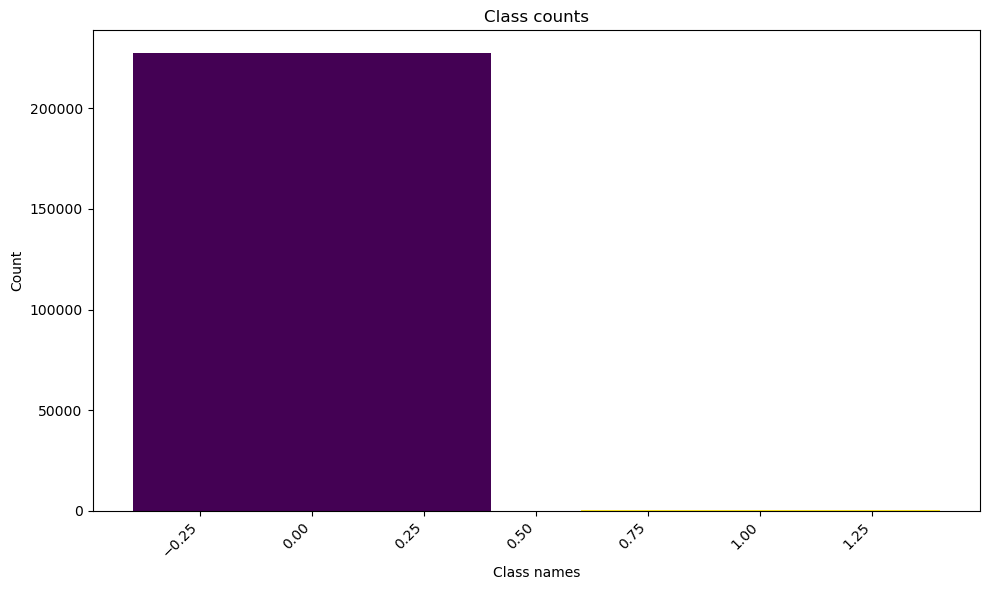

,time,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v21,v22,v23,v24,v25,v26,v27,v28,amount,class
count,227846.000000,227846.000000,227846.000000,227846.000000,227846.000000,227846.000000,227846.000000,227846.000000,227846.000000,227846.000000,...,227846.000000,227846.000000,227846.000000,227846.000000,227846.000000,227846.000000,227846.000000,227846.000000,227846.000000,227846.000000
mean,94878.135403,0.003417,0.002014,0.000485,0.000079,0.000091,-0.001396,-0.000349,-0.000033,-0.001121,...,0.000524,-0.000953,-0.000134,-0.000457,0.000899,-0.000080,0.000026,0.000055,87.890337,0.001699
std,47487.612836,1.951477,1.632831,1.511987,1.414350,1.360711,1.323366,1.217531,1.198509,1.098270,...,0.738604,0.725281,0.626764,0.605221,0.520714,0.481668,0.398954,0.324199,238.806140,0.041178
min,0.000000,-46.855047,-60.464618,-33.680984,-5.683171,-42.147898,-23.496714,-41.506796,-73.216718,-13.434066,...,-34.830382,-9.499423,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-11.710896,0.000000,0.000000
25%,54224.000000,-0.918903,-0.596600,-0.890425,-0.848205,-0.691445,-0.770017,-0.553157,-0.208821,-0.643276,...,-0.228295,-0.543157,-0.161937,-0.354525,-0.316886,-0.326533,-0.070766,-0.052799,5.520000,0.000000
50%,84793.500000,0.021103,0.065595,0.180289,-0.018959,-0.053240,-0.275132,0.040044,0.022233,-0.051956,...,-0.029798,0.006449,-0.011093,0.040527,0.018175,-0.052024,0.001296,0.011200,22.000000,0.000000
75%,139366.000000,1.316328,0.803540,1.027265,0.744322,0.612325,0.398199,0.569602,0.326577,0.594780,...,0.186244,0.527882,0.147648,0.438460,0.351476,0.239792,0.090715,0.078090,77.097500,0.000000
max,172792.000000,2.451888,21.467203,9.382558,16.875344,34.099309,23.917837,44.054461,20.007208,15.594995,...,27.202839,10.503090,22.083545,4.022866,7.519589,3.517346,12.152401,22.620072,18910.000000,1.000000


In [29]:
analyze_data(df, 'class')

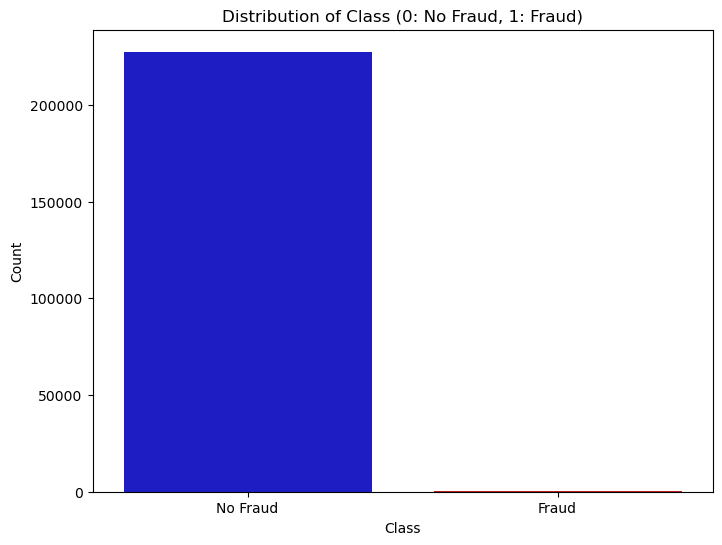

In [30]:
# Visualize the class distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='class', data=df, palette=colors)
plt.title('Distribution of Class (0: No Fraud, 1: Fraud)')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks([0, 1], ['No Fraud', 'Fraud']) # Explicitly label the x-ticks
plt.show()

In [31]:
def plot_distributions(df, class_names):
  for class_name in class_names:
    df_frist_class = df[class_name]
    fig1, ax1 = plt.subplots(figsize=(9, 5))
    sns.distplot(df_frist_class.values, ax=ax1, color='r')
    ax1.set_title('Distribution of ' + class_name, fontsize=14)
    ax1.set_xlim([df_frist_class.min(), df_frist_class.max()])
    plt.show()

/var/folders/b_/6hg48zw14yz957yrgs4mg_xc0000gn/T/ipykernel_76797/881755835.py:5: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




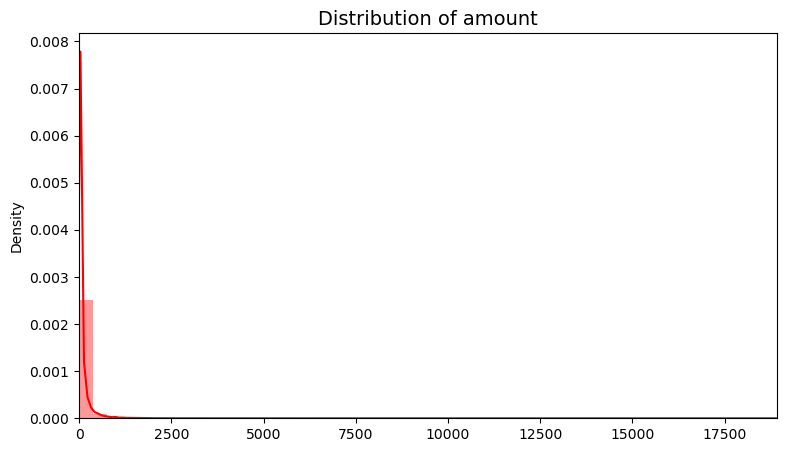

/var/folders/b_/6hg48zw14yz957yrgs4mg_xc0000gn/T/ipykernel_76797/881755835.py:5: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




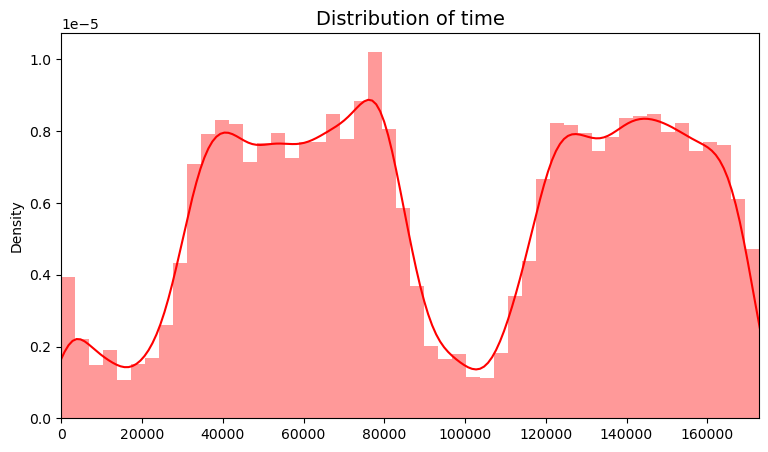

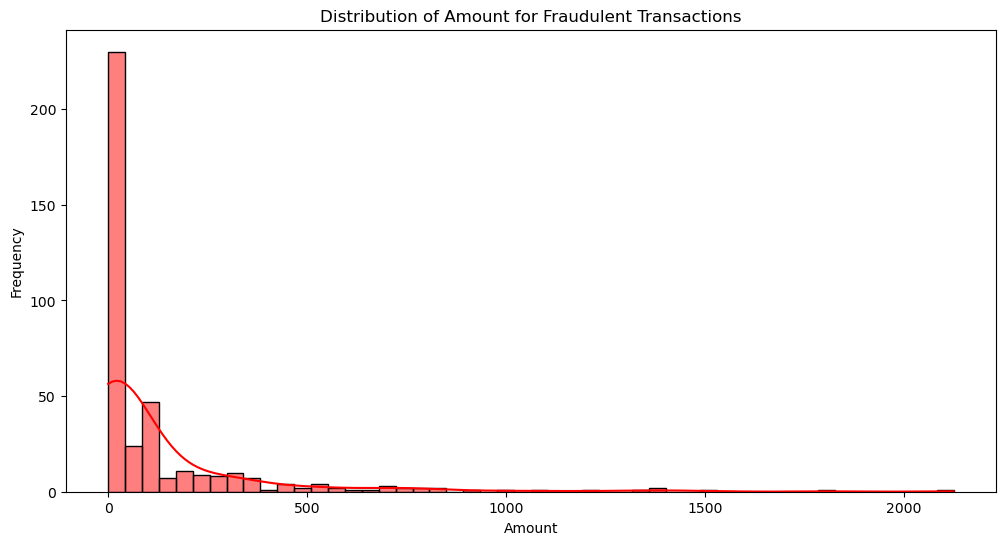

In [32]:
plot_distributions(df, ['amount', 'time'])

# Plot distribution of Amount for fraudulent transactions only
df_third_class = df['class']
plt.figure(figsize=(12, 6))
sns.histplot(data=df[df['class'] == 1], x='amount', bins=50, kde=True, color='red', stat='count')
plt.title('Distribution of Amount for Fraudulent Transactions')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

In [33]:
from sklearn.preprocessing import StandardScaler, RobustScaler

# RobustScaler is less prone to outliers.

std_scaler = StandardScaler()
rob_scaler = RobustScaler()

df['scaled_amount'] = rob_scaler.fit_transform(df['amount'].values.reshape(-1,1))
df['scaled_time'] = rob_scaler.fit_transform(df['time'].values.reshape(-1,1))

df.drop(['time','amount'], axis=1, inplace=True)

scaled_amount = df['scaled_amount']
scaled_time = df['scaled_time']

df.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
df.insert(0, 'scaled_amount', scaled_amount)
df.insert(1, 'scaled_time', scaled_time)

# Amount and Time are Scaled!

df.head()

,scaled_amount,scaled_time,v1,v2,v3,v4,v5,v6,v7,v8,...,v20,v21,v22,v23,v24,v25,v26,v27,v28,class
43428,4.780692,-0.508427,-16.526507,8.584972,-18.649853,9.505594,-13.793819,-2.832404,-16.701694,7.517344,...,-1.514923,1.190739,-1.127670,-2.358579,0.673461,-1.413700,-0.462762,-2.018575,-1.042804,1
49906,6.959170,-0.476058,0.339812,-2.743745,-0.134070,-1.385729,-1.451413,1.015887,-0.524379,0.224060,...,0.506044,-0.213436,-0.942525,-0.526819,-1.156992,0.311211,-0.746647,0.040996,0.102038,0
29474,0.125738,-0.579144,1.399590,-0.590701,0.168619,-1.029950,-0.539806,0.040444,-0.712567,0.002299,...,0.212877,0.102398,0.168269,-0.166639,-0.810250,0.505083,-0.232340,0.011409,0.004634,0
276481,-0.286403,0.966967,-0.432071,1.647895,-1.669361,-0.349504,0.785785,-0.630647,0.276990,0.586025,...,-0.244633,0.358932,0.873663,-0.178642,-0.017171,-0.207392,-0.157756,-0.237386,0.001934,0
278846,-0.294925,0.982823,2.014160,-0.137394,-1.015839,0.327269,-0.182179,-0.956571,0.043241,-0.160746,...,-0.255293,-0.238644,-0.616400,0.347045,0.061561,-0.360196,0.174730,-0.078043,-0.070571,0


Distribution of the classes in the subsampled dataset:
1    0.5
0    0.5
Name: class, dtype: float64


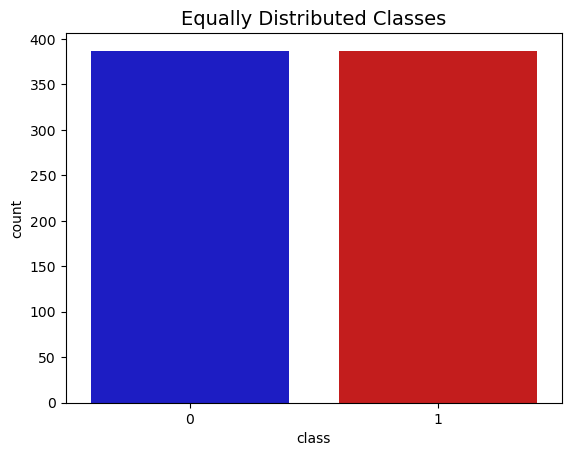

In [34]:
df = df.sample(frac=1)

fraud_df = df.loc[df['class'] == 1]
non_fraud_df = df.loc[df['class'] == 0][:num_of_frauds]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

new_shuffled_df = normal_distributed_df.sample(frac=1, random_state=42)

new_shuffled_df.head()

print('Distribution of the classes in the subsampled dataset:')
print(new_shuffled_df['class'].value_counts() / len(new_shuffled_df))

sns.countplot(x='class', data=new_shuffled_df, palette=colors)
plt.title('Equally Distributed Classes', fontsize=14)
plt.show()

In [35]:
df.head()

,scaled_amount,scaled_time,v1,v2,v3,v4,v5,v6,v7,v8,...,v20,v21,v22,v23,v24,v25,v26,v27,v28,class
113368,-0.257343,-0.138046,-0.612282,1.132224,1.234392,-0.192202,0.060297,-0.658193,0.617158,0.024300,...,0.180147,-0.302543,-0.779244,-0.068306,-0.160487,-0.106357,0.109851,0.369267,0.172247,0
59421,-0.293388,-0.422394,1.257913,0.597510,-0.578114,0.992278,0.510822,-0.376638,0.178060,-0.043906,...,-0.064133,-0.056782,-0.122684,-0.239118,-0.642818,0.778060,-0.291457,0.027178,0.032374,0
238739,-0.097796,0.763495,0.214233,0.204280,0.588482,-1.919046,0.486972,-0.928910,1.133106,-0.810855,...,0.213672,0.026536,0.382433,-0.128077,1.186252,-0.101475,-0.444499,-0.427111,-0.410155,0
70501,-0.255807,-0.362917,-0.975258,0.354607,1.367837,-1.567547,0.641021,0.011974,0.492806,0.003845,...,-0.067720,-0.096809,-0.032785,0.058324,-0.635358,-0.516740,0.705444,-0.096091,-0.073831,0
111181,-0.307219,-0.148734,1.083204,-0.311229,1.143350,0.495362,-0.697320,0.833307,-0.930673,0.490311,...,-0.185637,0.190798,0.742300,0.007084,-0.237682,0.138390,0.617154,0.033197,0.004315,0


# Split and save processed dataset to file

In [36]:
from sklearn.model_selection import train_test_split

# Split into train and test sets (80-20 split)
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Save train and test datasets
train_df.to_csv('data/processed/binary_unbalanced_credit_card_fraud/' + TRAIN_FILE_NAME, index=False)
test_df.to_csv('data/processed/binary_unbalanced_credit_card_fraud/' + TEST_FILE_NAME, index=False)

print("Training set shape:", train_df.shape)
print("Testing set shape:", test_df.shape)


Training set shape: (182276, 31)
Testing set shape: (45570, 31)
